# CZ3006 Net Centric Computing Lab 4
Analysing Network traffic log data in Python

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Reading in dataframe

In [2]:
file = 'SFlow_Data_1.csv.csv' # Replace file with csv filepath
df = pd.read_csv(file, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69370 entries, 0 to 69369
Data columns (total 21 columns):
0     69370 non-null object
1     69370 non-null object
2     69370 non-null int64
3     69370 non-null int64
4     69370 non-null object
5     69370 non-null object
6     69370 non-null object
7     69370 non-null float64
8     69370 non-null int64
9     69370 non-null object
10    69370 non-null object
11    69370 non-null int64
12    69370 non-null object
13    69370 non-null int64
14    69370 non-null float64
15    69370 non-null int64
16    69370 non-null object
17    69370 non-null int64
18    69370 non-null int64
19    69370 non-null int64
20    1305 non-null float64
dtypes: float64(3), int64(9), object(9)
memory usage: 11.1+ MB


In [3]:
df[0].value_counts()

FLOW    68065
CNTR     1305
Name: 0, dtype: int64

#### Upon inspection of dataframe, we note the following:
- Columns are unlabelled; we will label them accordingly
- First column, which is the type column, has 2 values, 'FLOW' and 'CNTR'
    - CNTR rows have 21 column values; They are the counter samples. 
    - Since we are looking at FLOW entries only, we drop the rows of type CNTR.

In [4]:
# Clean dataframe
cols = [
    'type', 'sflow_agent_address', 'inputPort', 'outputPort', 'src_MAC', 
    'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan', 'src_IP', 
    'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type', 
    'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_size', 'sampling rate',
    '21' # 21 to signify the extra column of CNTR rows for now
]

# Set columns
df.columns = cols

In [5]:
# Only include entries of type FLOW
df = df[df['type'] == 'FLOW'].reset_index()
df.head()

,index,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,...,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling rate,21
0,0,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,...,6,0x00,50,51216.0,23505,0x10,1518,1500,2048,NaN
1,1,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,...,6,0x00,56,23159.0,80,0x10,74,52,2048,NaN
2,2,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,...,6,0x00,50,50041.0,20739,0x10,1518,1500,2048,NaN
3,3,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,...,17,0x00,120,54241.0,26510,0x10,116,94,2048,NaN
4,4,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,...,6,0x00,56,53923.0,34262,0x10,70,52,2048,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68065 entries, 0 to 68064
Data columns (total 22 columns):
index                                  68065 non-null int64
type                                   68065 non-null object
sflow_agent_address                    68065 non-null object
inputPort                              68065 non-null int64
outputPort                             68065 non-null int64
src_MAC                                68065 non-null object
dst_MAC                                68065 non-null object
ethernet_type                          68065 non-null object
in_vlan                                68065 non-null float64
out_vlan                               68065 non-null int64
src_IP                                 68065 non-null object
dst_IP                                 68065 non-null object
IP_protocol                            68065 non-null int64
ip_tos                                 68065 non-null object
ip_ttl                                 68

We notice the column '21' is now empty.

### Lab 4 Exercises

In [7]:
# Function to format series as a dataframe
def display(index):
    temp = df[index].value_counts().to_frame()
    temp.index.name = index
    temp.columns = ['Counts']
    return temp

### Exercise 4A: Top Talkers & Listeners

Assumption: We find Top Talkers & Listeners by the packet count, not the *total amount* of data sent.

The IP addresses of the top 5 talkers are as shown, with counts corresponding to the number of packets.

In [8]:
display('src_IP').head(5)

,Counts
src_IP,
193.62.192.8,3041
155.69.160.32,2975
130.14.250.11,2604
14.139.196.58,2452
140.112.8.139,2056


IP addresses and counts shown below for top 5 listeners.

In [9]:
display('dst_IP').head(5)

,Counts
dst_IP,
103.37.198.100,3841
137.132.228.15,3715
202.21.159.244,2446
192.101.107.153,2368
103.21.126.2,2056


### Exercise 4B: Transport Protocol
Top 5 application uses shown by 5 most common port numbers.

TCP: 6, UDP: 17

In [10]:
df2 = df['IP_protocol'].value_counts().head()
tcp_count = df2[6]
udp_count = df2[17]

In [11]:
print('We observe that there are {} packets corresponding to the TCP protocol, and {} packets for the UDP protocol.'.format(tcp_count, udp_count))

We observe that there are 56064 packets corresponding to the TCP protocol, and 9462 packets for the UDP protocol.


In [12]:
ex4b = pd.DataFrame(data=[(tcp_count)*(100/len(df)), (udp_count)*(100/len(df))], index=['TCP', 'UDP'], columns=['% Percentage'])
ex4b

,% Percentage
TCP,82.368324
UDP,13.901418


### Exercise 4C: Applications Protocol
Port numbers define the application service requested.

In [13]:
display('udp_dst_port/tcp_dst_port/icmp_code').head(5)

,Counts
udp_dst_port/tcp_dst_port/icmp_code,
443,13423
80,2647
52866,2068
45512,1356
56152,1341


443: HTTPS

0: Reserved port; should not be used for TCP/UDP
- Packets that do not need port numbers (like ICMP) use port 0
- For linux based systems: to get the next available port from the OS (dynamically allocated ports)
    
Port numbers like 56152 or 43930: Private ports

80: HTTP

### Exercise 4D: Traffic Intensity

Using the packet sizes of all the packets, we can calculate the total traffic in MBs.

In [14]:
ex4d = df['packet_size']

In [15]:
print('Size of all {0} packets: approx. {1:.2f} MBs'.format(len(ex4d), (ex4d.sum())/(2**20))) # Convert to MegaBytes

Size of all 68065 packets: approx. 63.13 MBs


### Exercise 4E: Additional Analysis

Top 5 Communication pairs are obtained by grouping by src_IP (grouping by dst_IP will work as well)

In [16]:
ex4e = df.groupby(['src_IP', 'dst_IP']).size().sort_values(ascending=False).to_frame()
ex4e.columns = ['Counts']
ex4e

,,Counts
src_IP,dst_IP,
193.62.192.8,137.132.228.15,3041
130.14.250.11,103.37.198.100,2599
14.139.196.58,192.101.107.153,2368
140.112.8.139,103.21.126.2,2056
137.132.228.15,193.62.192.8,1910
...,...,...
168.95.43.158,123.136.71.68,1
168.96.248.140,203.135.190.4,1
169.229.216.9,202.170.60.242,1


Visualing communication between different IP hosts

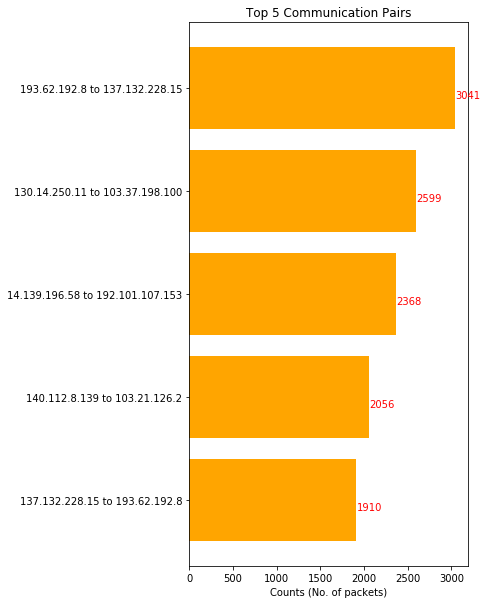

In [17]:
fig, ax = plt.subplots(figsize=(5,10))
labels = [i[0] + " to " + i[1] for i in ex4e.head(5).index]
values = [v for v in ex4e.head(5).Counts]
index = np.arange(len(values))

ax.barh(index, values, align="center", color='orange')
ax.set_yticks(index)
ax.set_yticklabels(labels)
ax.set_xlabel("Counts (No. of packets)")
ax.set_title("Top 5 Communication Pairs")

# Annotate
for i, v in enumerate(values):
    ax.text(v+2, i+0.1, str(v), color='red')

ax.invert_yaxis() # Invert to show highest count on top

For the top communication pair - between 193.162.192.8 and 137.132.228.15

From the [mxtoolbox IP Lookup Tool](https://mxtoolbox.com/SuperTool.aspx?action=arin%3a193.62.192.8&run=toolpage), it appears to be communication packets between EU Bioinformatics Institute and National University of Singapore (NUS).